# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, accuracy_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV


In [51]:
# Cargar archivo
df= pd.read_csv("data/temps.csv")
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [52]:
# Eliminar 'week' (texto) y 'year' (es siempre 2016, no aporta nada)
df = df.drop(['week', 'year'], axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           348 non-null    int64  
 1   day             348 non-null    int64  
 2   temp_2          348 non-null    int64  
 3   temp_1          348 non-null    int64  
 4   average         348 non-null    float64
 5   actual          348 non-null    int64  
 6   forecast_noaa   348 non-null    int64  
 7   forecast_acc    348 non-null    int64  
 8   forecast_under  348 non-null    int64  
 9   friend          348 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 27.3 KB


<Axes: ylabel='temp_1'>

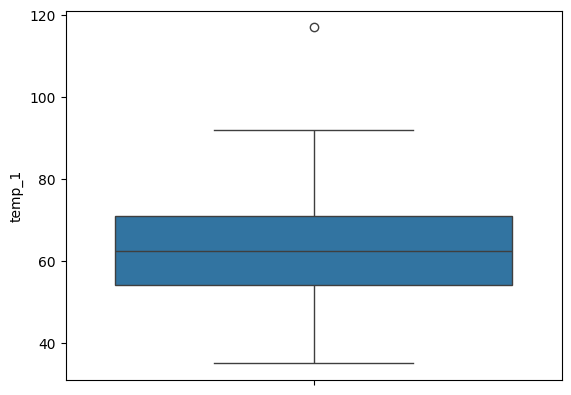

In [53]:
sns.boxplot(df["temp_1"])

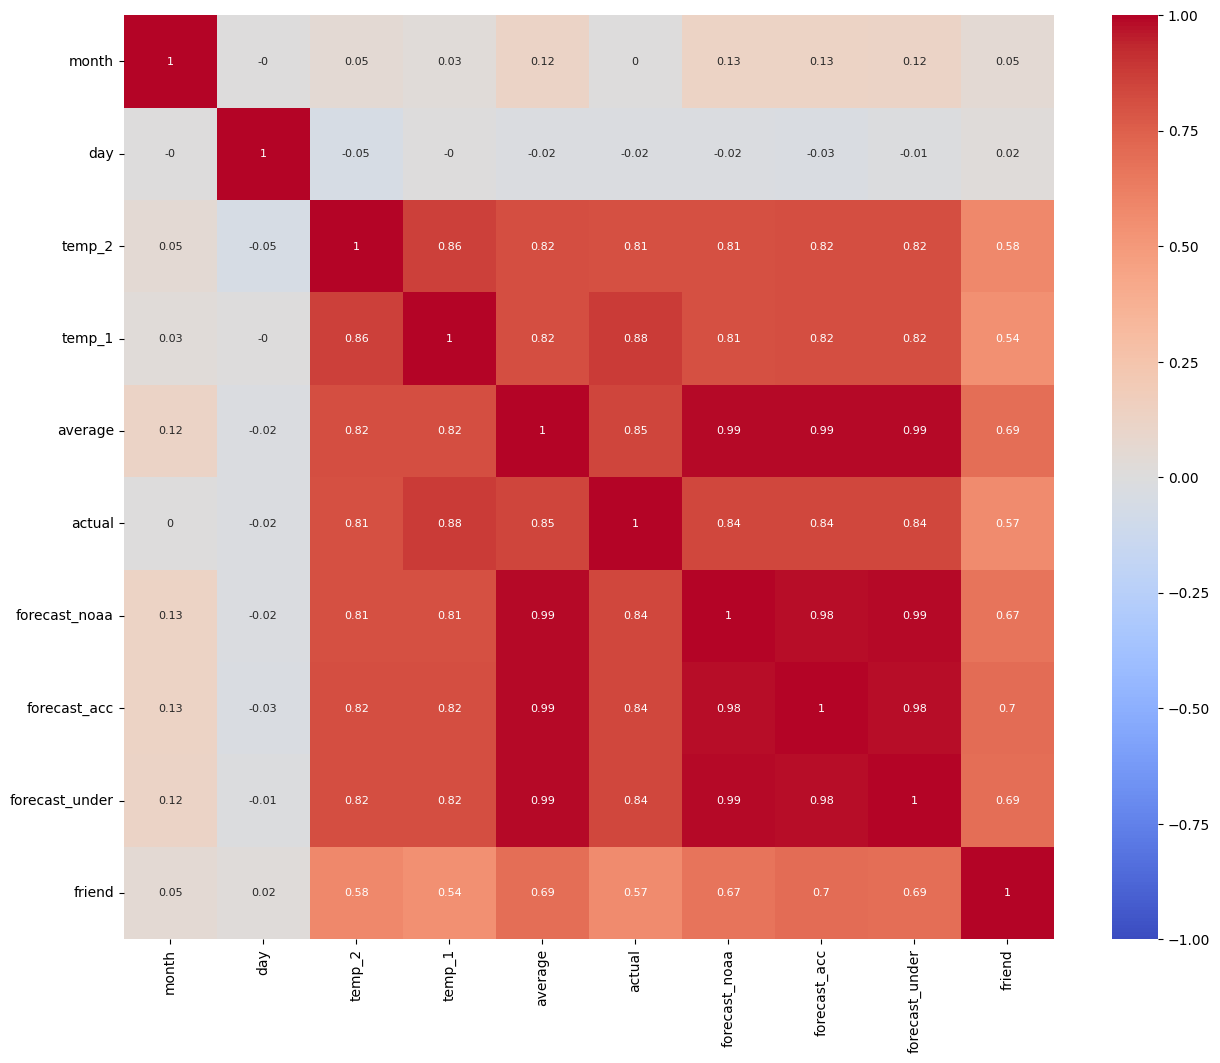

In [54]:
plt.figure(figsize=(15, 12))

sns.heatmap(df.corr(numeric_only=True).round(2), annot= True, vmin=-1, cmap="coolwarm", annot_kws={"size": 8})

plt.show()

In [55]:
df.describe()

,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


### 3. Selecciona variables y divide en train y test

In [56]:
X = df.drop(columns=["actual"])
y = df["actual"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [58]:
print("Datos X_train:", X_train.shape)
print("Datos X_test:", X_test.shape)

Datos X_train: (278, 9)
Datos X_test: (70, 9)


### 4. Entrena el modelo


In [59]:
dtr = DecisionTreeRegressor(max_depth=2)

# Entrenar
dtr.fit(X_train,y_train)

# Predecir con valores X_test
pred= dtr.predict(X_test)

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [60]:
print("R2 Score (Calidad):", r2_score(y_test, pred))
print("MAE (Error absoluto medio):", mean_absolute_error(y_test, pred))
print("MSE (Error cuadrático medio):", mean_squared_error(y_test, pred))
print("RMSE (Raíz cuadrada del error):", np.sqrt(mean_squared_error(y_test, pred)))
print("MAPE (Porcentaje de error):", mean_absolute_percentage_error(y_test, pred))

R2 Score (Calidad): 0.7307506227036282
MAE (Error absoluto medio): 4.888811585240156
MSE (Error cuadrático medio): 37.64787660374395
RMSE (Raíz cuadrada del error): 6.135786551351338
MAPE (Porcentaje de error): 0.07740495191086964


In [61]:
dtr.score(X_test, y_test)

0.7307506227036282

### 6. Representa el árbol de decisión

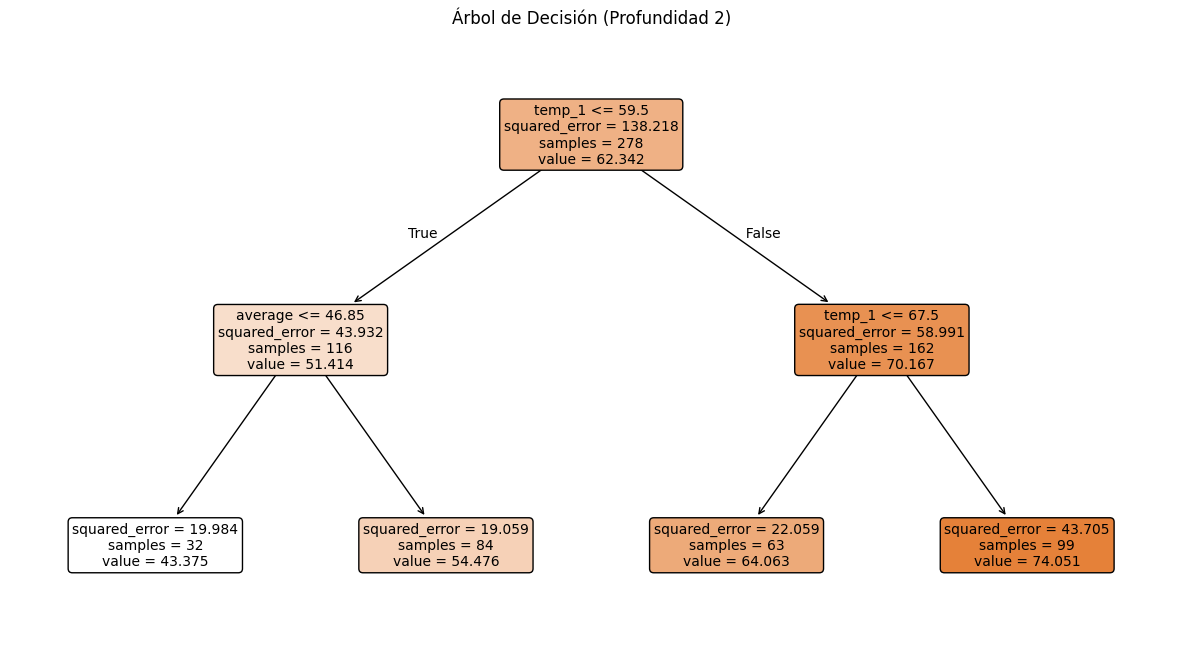

In [62]:
plt.figure(figsize = (15, 8))
plot_tree(dtr, 
          feature_names = X.columns, 
          filled = True, 
          rounded = True, 
          fontsize = 10)
plt.title("Árbol de Decisión (Profundidad 2)")
plt.show()

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [63]:
# Crear nuevo árbol de 3 niveles
dtr3 = DecisionTreeRegressor(max_depth=3)

# Nuevo entrenamiento
dtr3.fit(X_train, y_train)

# Nuevas predicción
pred3 = dtr3.predict(X_test)
pred3

array([72.61842105, 61.37037037, 52.44444444, 66.08333333, 66.08333333,
       72.61842105, 72.61842105, 72.61842105, 61.37037037, 72.61842105,
       61.37037037, 72.61842105, 41.05882353, 61.37037037, 72.61842105,
       58.13333333, 61.37037037, 52.44444444, 58.13333333, 72.61842105,
       66.08333333, 58.13333333, 66.08333333, 61.37037037, 58.13333333,
       52.44444444, 66.08333333, 46.        , 58.13333333, 78.7826087 ,
       72.61842105, 66.08333333, 58.13333333, 78.7826087 , 78.7826087 ,
       61.37037037, 52.44444444, 52.44444444, 72.61842105, 46.        ,
       72.61842105, 52.44444444, 72.61842105, 41.05882353, 61.37037037,
       72.61842105, 52.44444444, 78.7826087 , 52.44444444, 41.05882353,
       46.        , 41.05882353, 66.08333333, 66.08333333, 72.61842105,
       61.37037037, 58.13333333, 58.13333333, 52.44444444, 58.13333333,
       66.08333333, 52.44444444, 61.37037037, 72.61842105, 61.37037037,
       58.13333333, 72.61842105, 72.61842105, 78.7826087 , 41.05

### 8. Vuelve a evaluar tu modelo

In [64]:
print("MAE Profundidad 2:", mean_absolute_error(y_test, pred))
print("MAE Profundidad 3:", mean_absolute_error(y_test, pred3))

# El modelo ha mejorado con más profundidad

MAE Profundidad 2: 4.888811585240156
MAE Profundidad 3: 4.424444494299118


### 9. Vuelve a representar su árbol

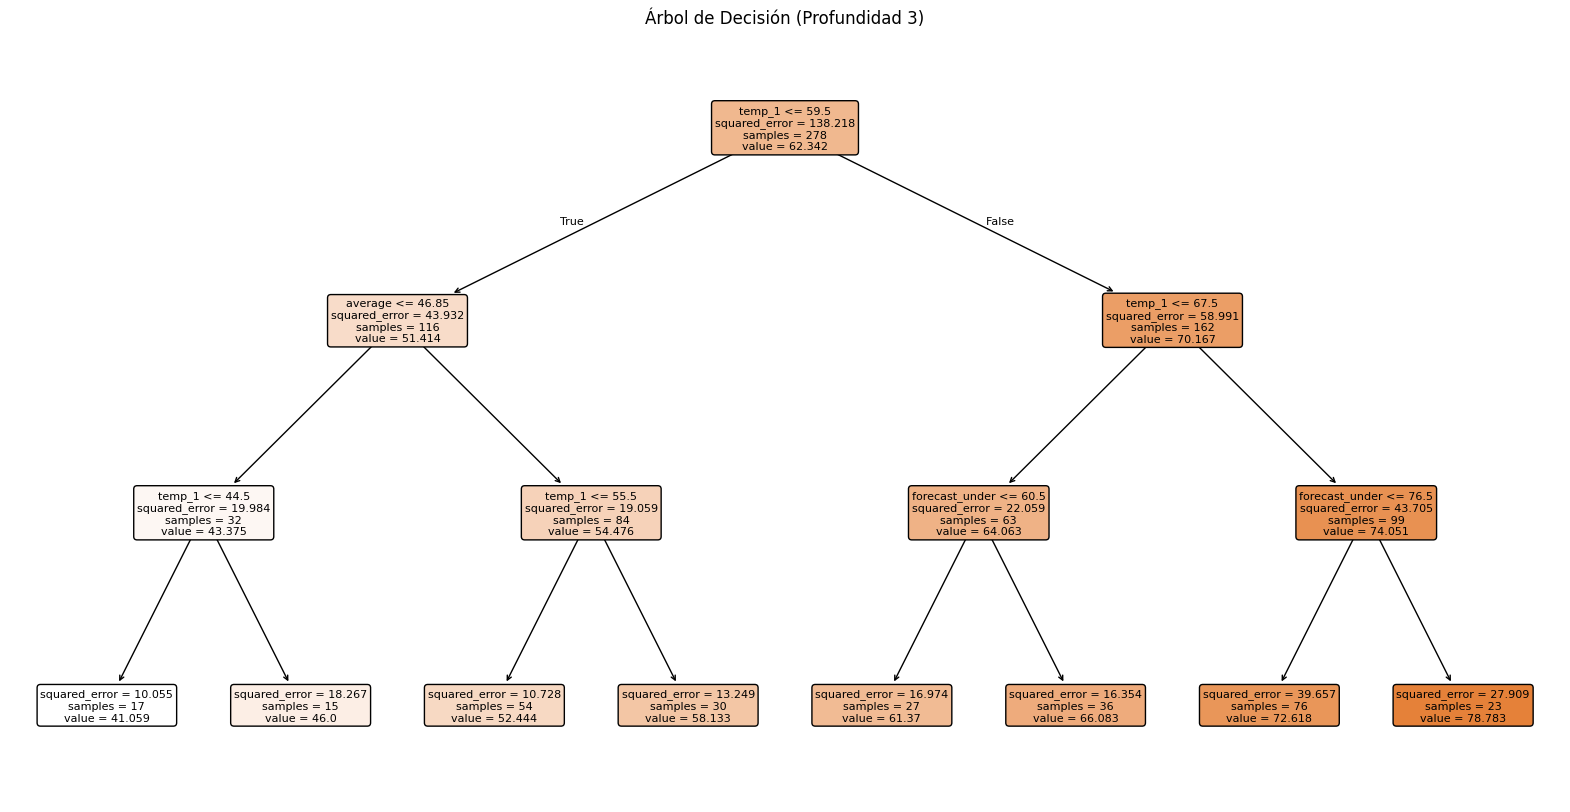

In [65]:
plt.figure(figsize = (20, 10))
plot_tree(dtr3, feature_names = X.columns, filled = True, rounded = True, fontsize = 8)
plt.title("Árbol de Decisión (Profundidad 3)")
plt.show()

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [66]:
# Definir parámetros a probar
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

# Configurar búsqueda (GridSearch)
grid_reg = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                        param_grid=param_grid,
                        cv=5, # 5 validaciones cruzadas
                        scoring='neg_mean_absolute_error',
                        verbose =3)

# Entrenar
grid_reg.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid_reg.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-4.531 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-4.692 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-4.870 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-4.471 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-4.528 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-4.531 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-4.692 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-4.870 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-4.471 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_

### 11. Obten el `feature_importances` de cada variable en el último modelo

In [67]:
# Obtener el mejor modelo
best_reg_model = grid_reg.best_estimator_

# Crear tabla de importancia
importancias = pd.DataFrame({'Variable': X.columns,'Importancia': best_reg_model.feature_importances_})

# Mostrar ordenado
print(importancias.sort_values('Importancia', ascending=False))

         Variable  Importancia
3          temp_1     0.851616
4         average     0.099802
7  forecast_under     0.019915
0           month     0.013992
6    forecast_acc     0.006446
5   forecast_noaa     0.005411
1             day     0.002818
2          temp_2     0.000000
8          friend     0.000000


In [68]:
best_reg_model.feature_importances_

array([0.01399239, 0.0028181 , 0.        , 0.85161564, 0.099802  ,
       0.00541114, 0.00644568, 0.01991505, 0.        ])

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [49]:
df['actual']

0      45
1      44
2      41
3      40
4      44
       ..
343    47
344    48
345    48
346    57
347    40
Name: actual, Length: 348, dtype: int64

In [72]:
# 1. Crear la variable objetivo binaria
# 15ºC son aprox 59ºF. Si temp > 59 es 1 (Calor), si no 0 (Frío).
df['es_calor'] = np.where(df['actual'] > 59, 1, 0)
print(df['es_calor'])

0      0
1      0
2      0
3      0
4      0
      ..
343    0
344    0
345    0
346    0
347    0
Name: es_calor, Length: 348, dtype: int64


In [48]:


# 2. Nuevas variables X e y (importante quitar 'actual' y 'es_calor' de las X)
X_class = df.drop(['actual', 'es_calor'], axis=1)
y_class = df['es_calor']

# 3. Nuevo Split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.25, random_state=42)

# 4. Grid Search para Clasificación
param_grid_clf = {
    'max_depth': [2, 4, 6, 8, None],
    'criterion': ['gini', 'entropy']
}

grid_clf = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                        param_grid=param_grid_clf,
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-1)

grid_clf.fit(X_train_c, y_train_c)

print("Mejores parámetros Clasificación:", grid_clf.best_params_)
print("Mejor Accuracy (Precisión):", grid_clf.best_score_)

Mejores parámetros Clasificación: {'criterion': 'entropy', 'max_depth': 6}
Mejor Accuracy (Precisión): 0.873512336719884
